# Project Report

## **Introduction**

This notebook documents the development process of our conversational AI system using Gradio and establish a backend that integrates Amazon Lex for conversational AI capabilities with e-commerce functionality via the Shopify API.

Conversational AI is a type of artificial intelligence that enables consumers to interact with computer applications like other humans.

### **Amazon Lex**
Amazon Lex is a service for building conversational interfaces into any application using voice and text

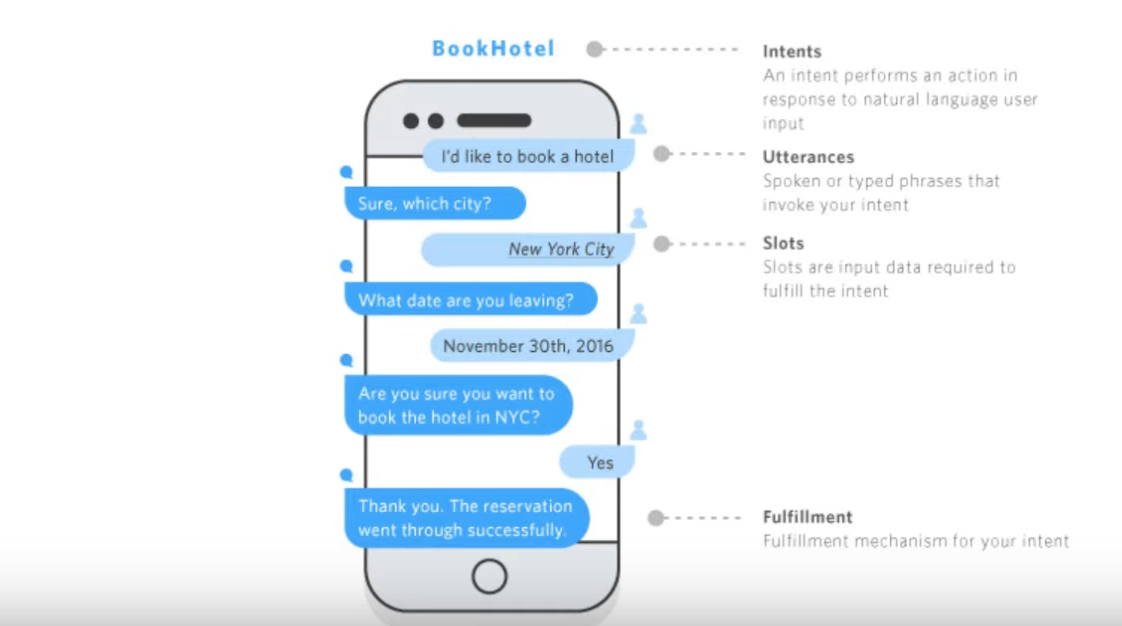

Amazon Lex integrates with AWS Lambda, which you can use to easily trigger functions to execute your back-end business logic for data retrieval and updates.

Once built, your chat bot can be deployed directly to chat platforms, mobile clients, and IoT devices.

### **Building a chat bot using Amazon Lex**

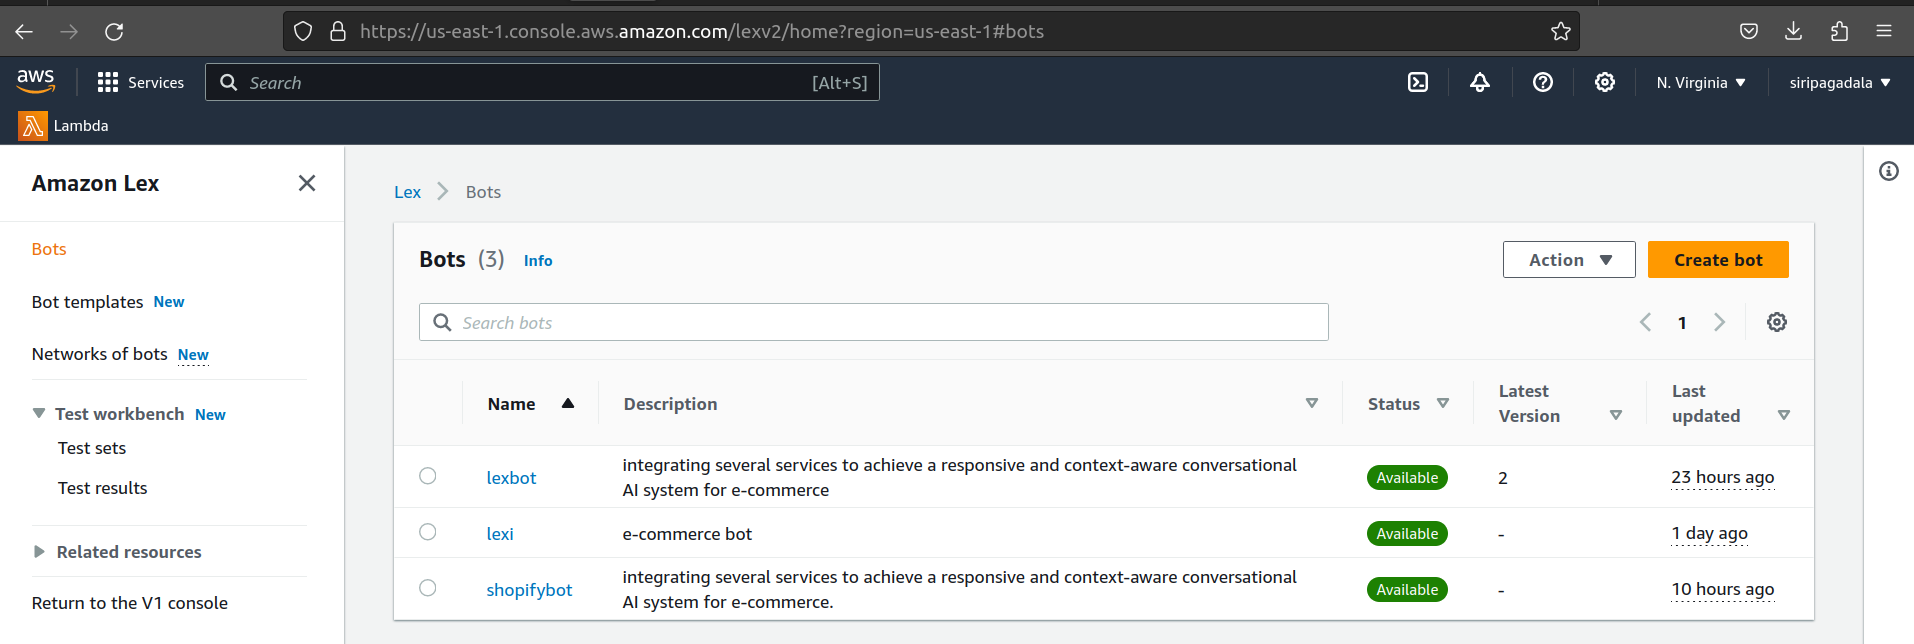
The bot I created for the assignment is named shopify bot.

-> Name your intent and give some sample utterances to start with
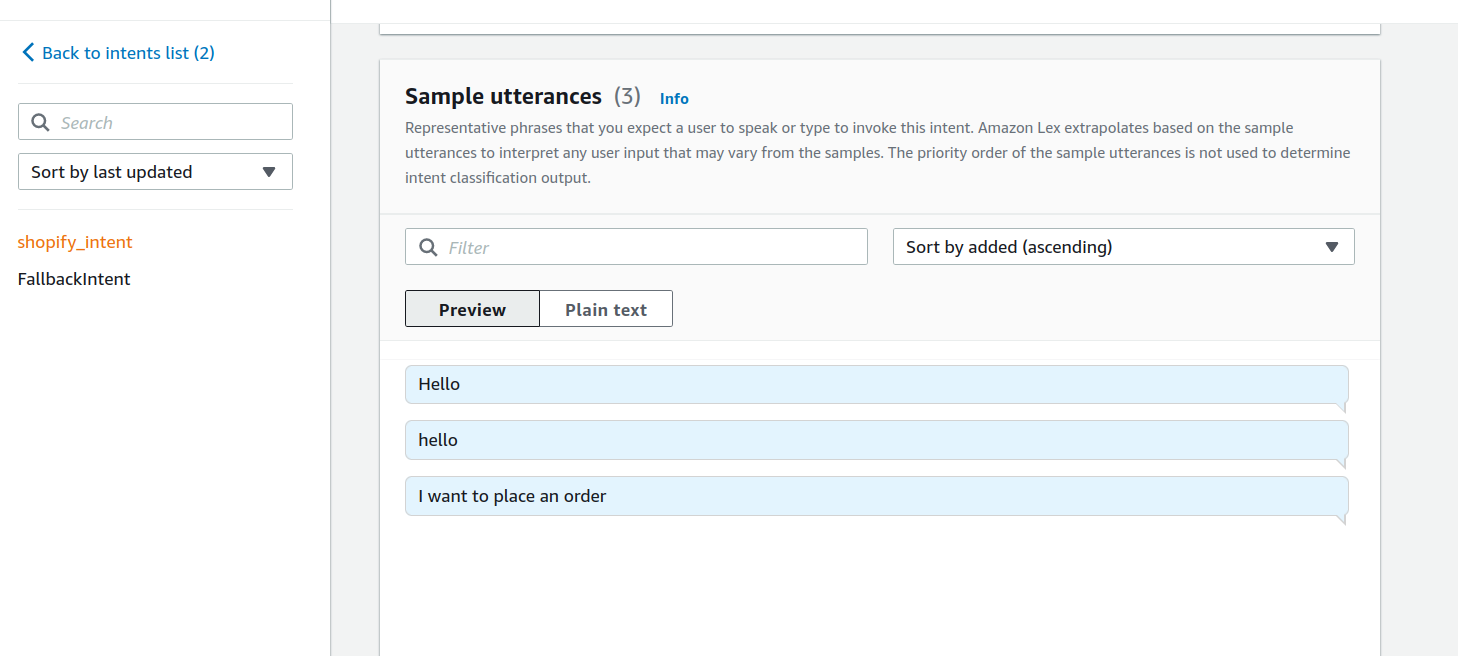

-> Add appropriate slots that fulfill the intent.
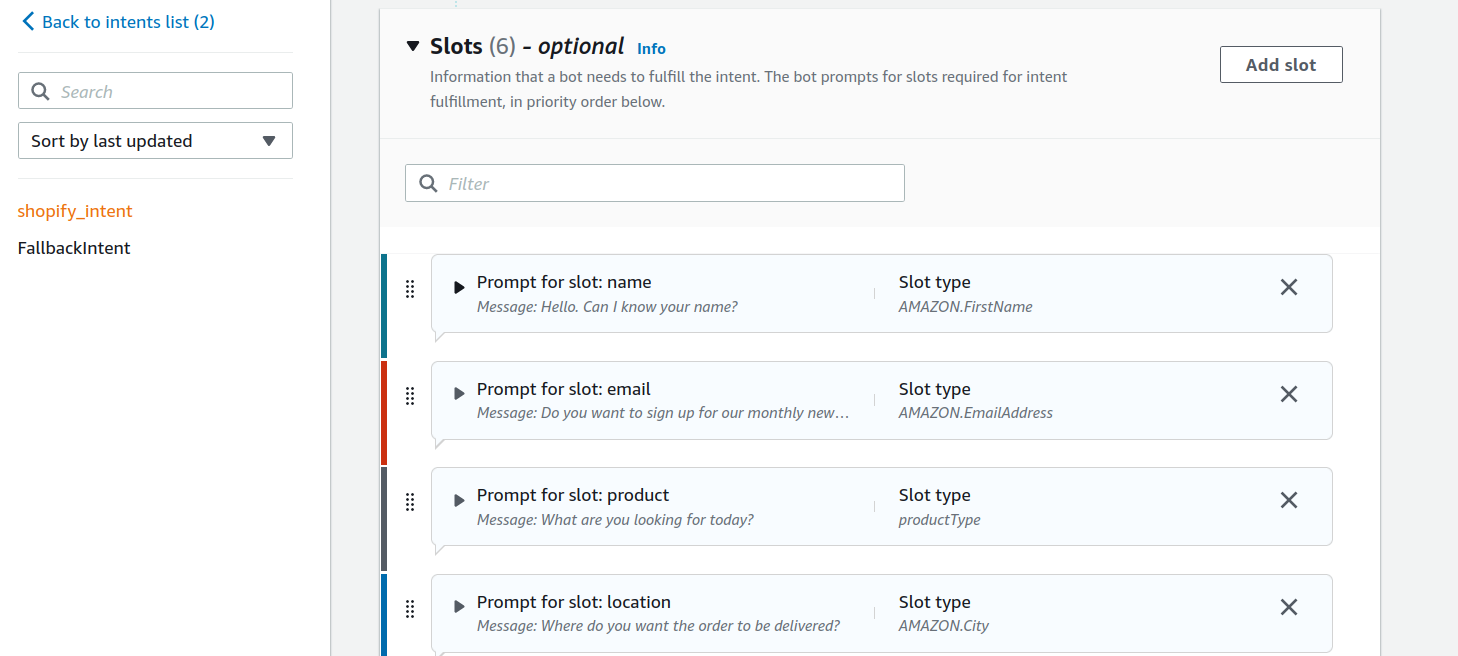

-> enable Confirmation, fulfillment and code hooks.
-> build and test the bot 

#### **Get AWS Credentials:**
    -> Obtain your AWS Access Key ID and Secret Access Key from the AWS Console.

### **code snippets** 
(used google collab to run the code)

**1. install dependencies**

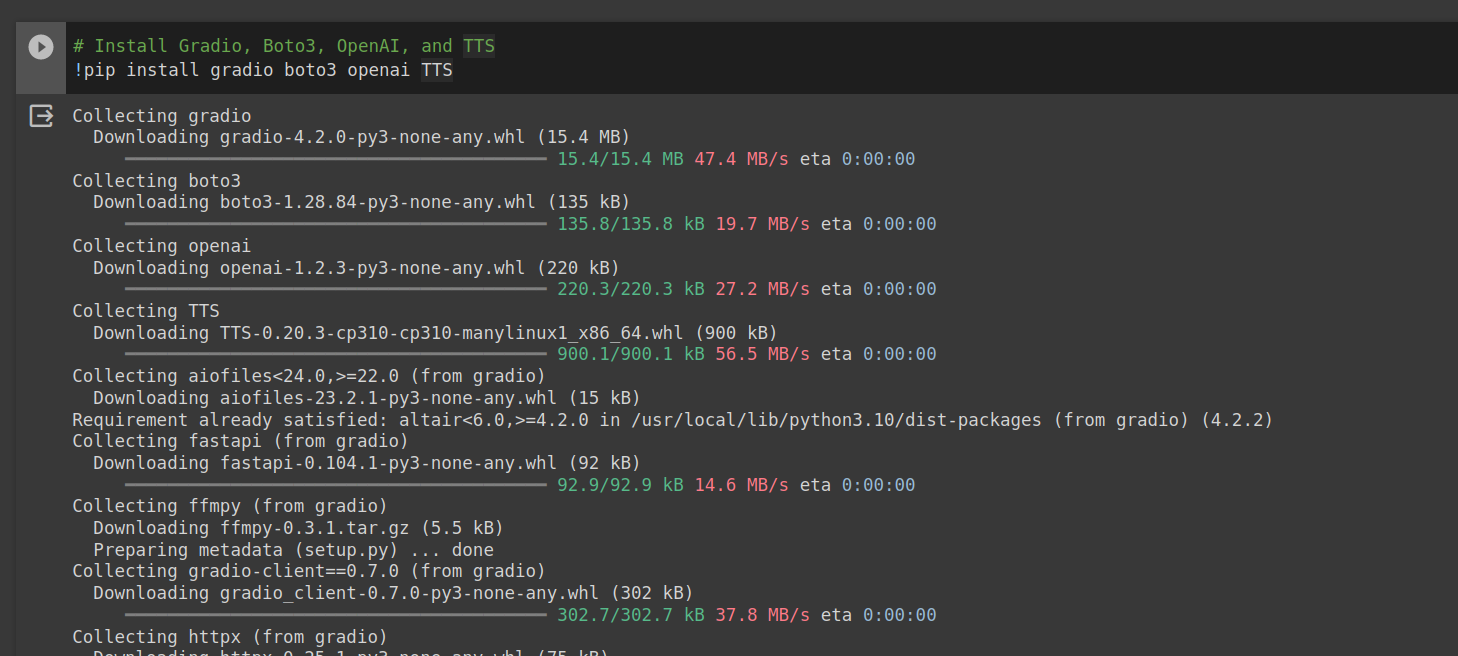

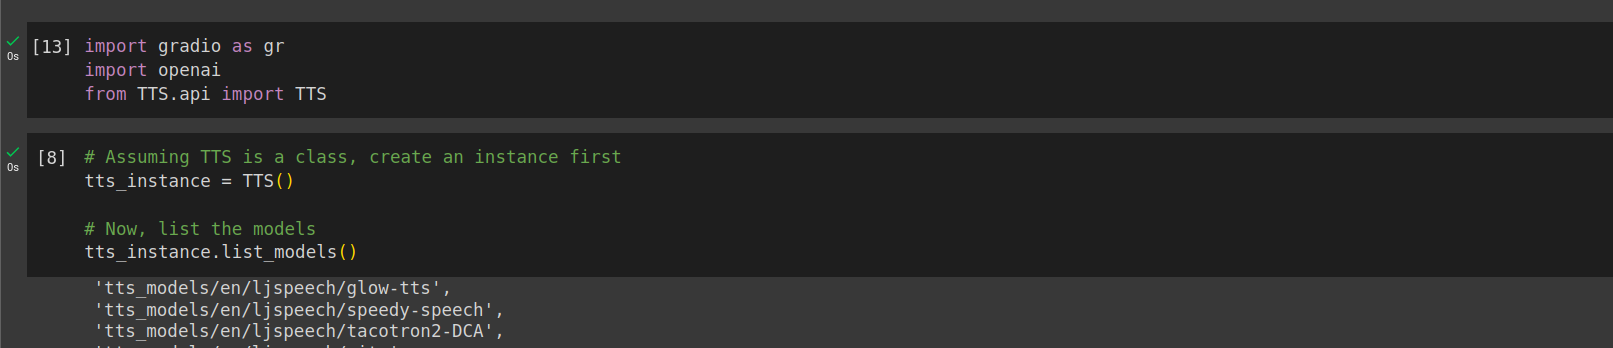

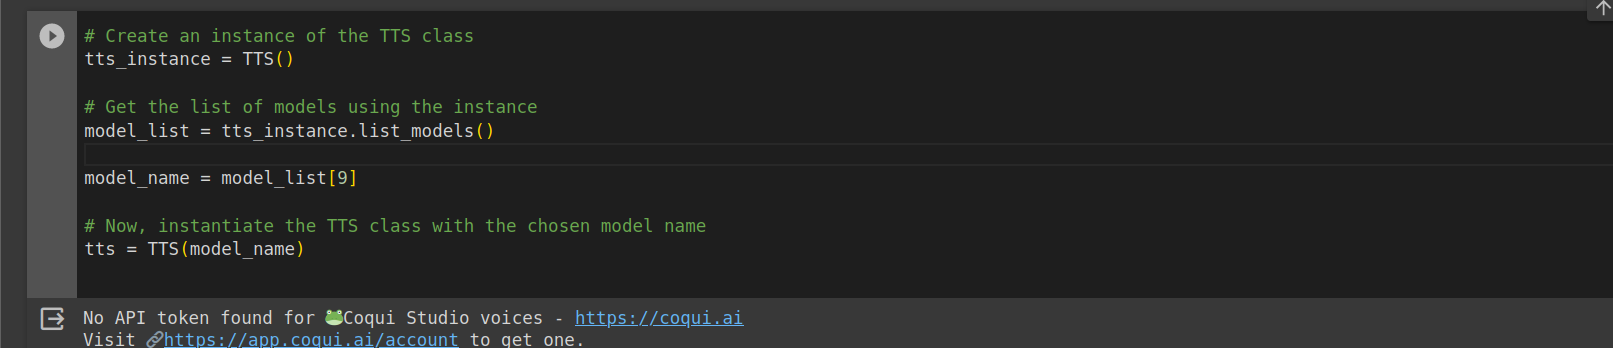

**2. Connect to shopifybot **
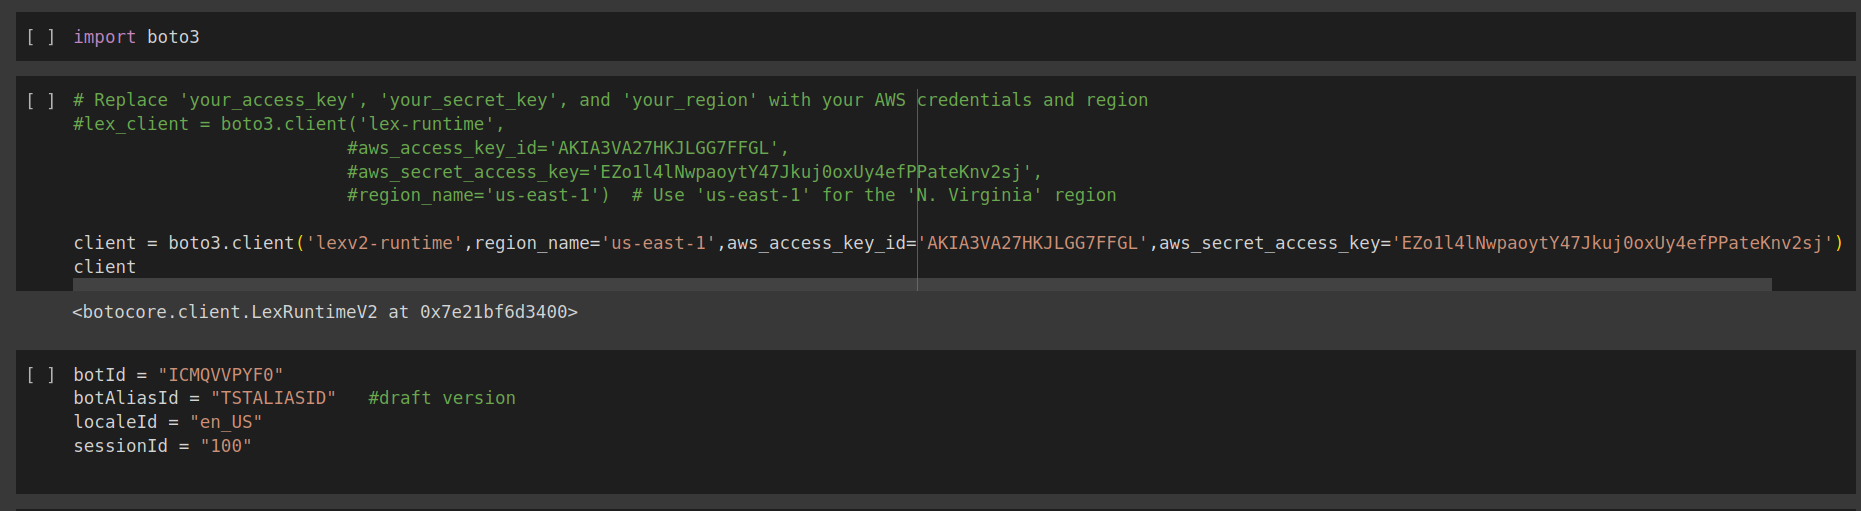

**3. Print intent and prompt/message**
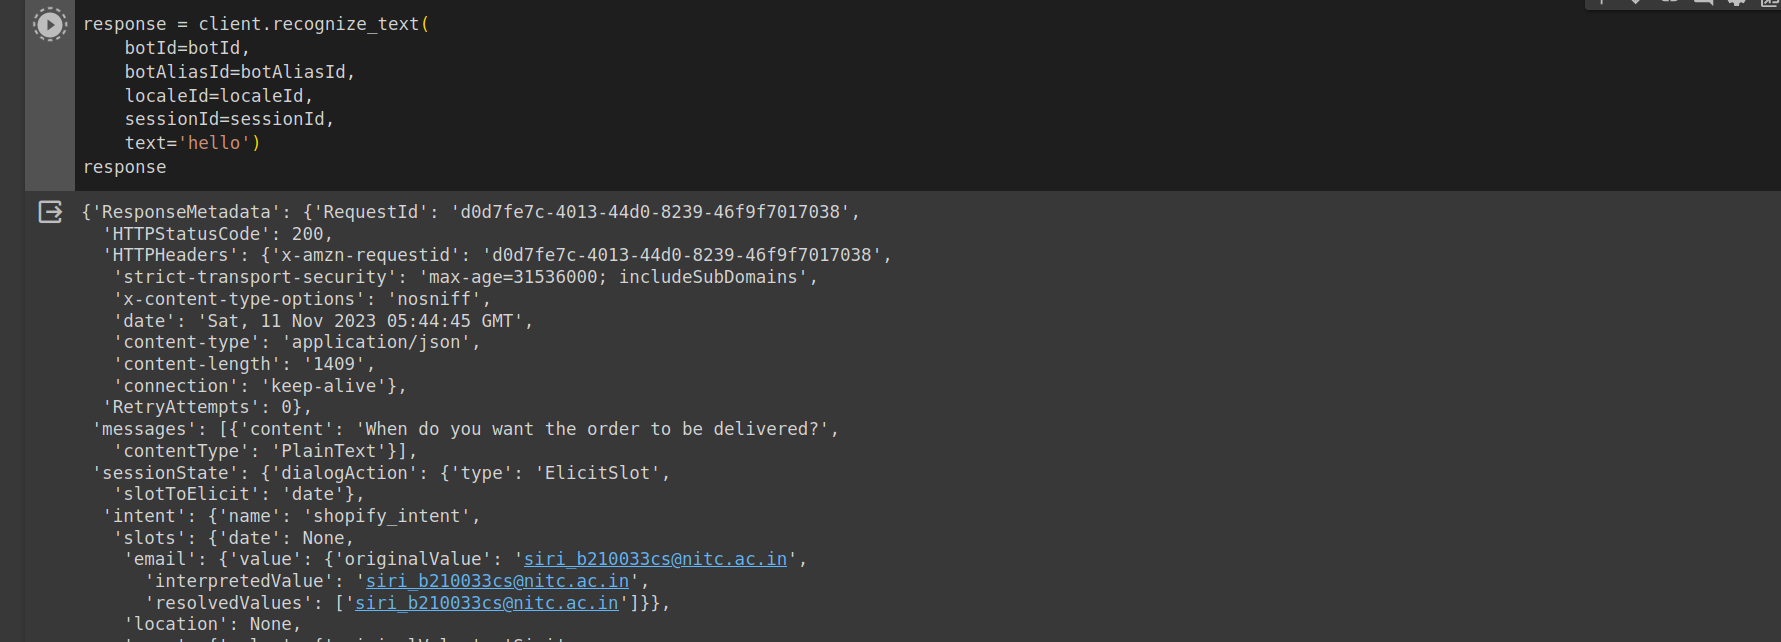

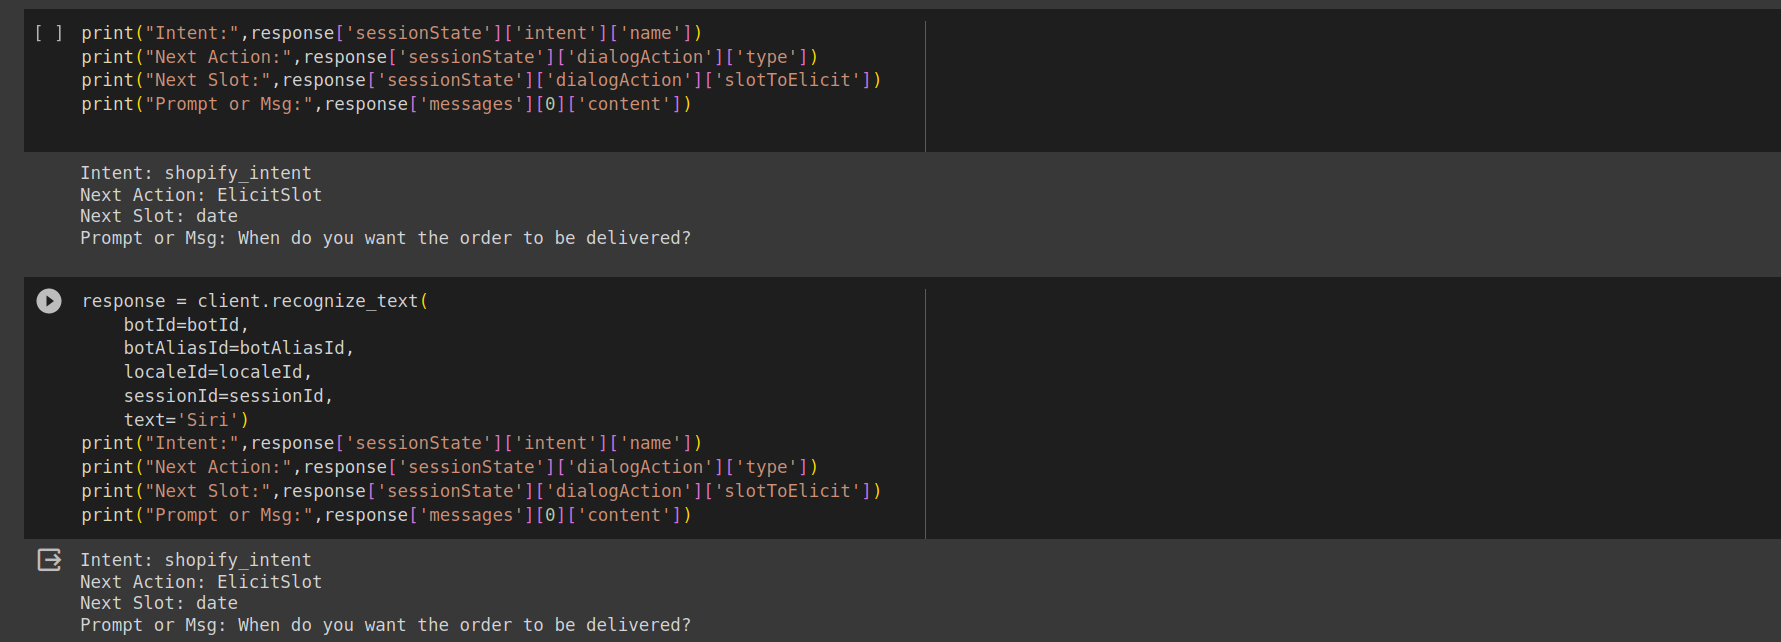

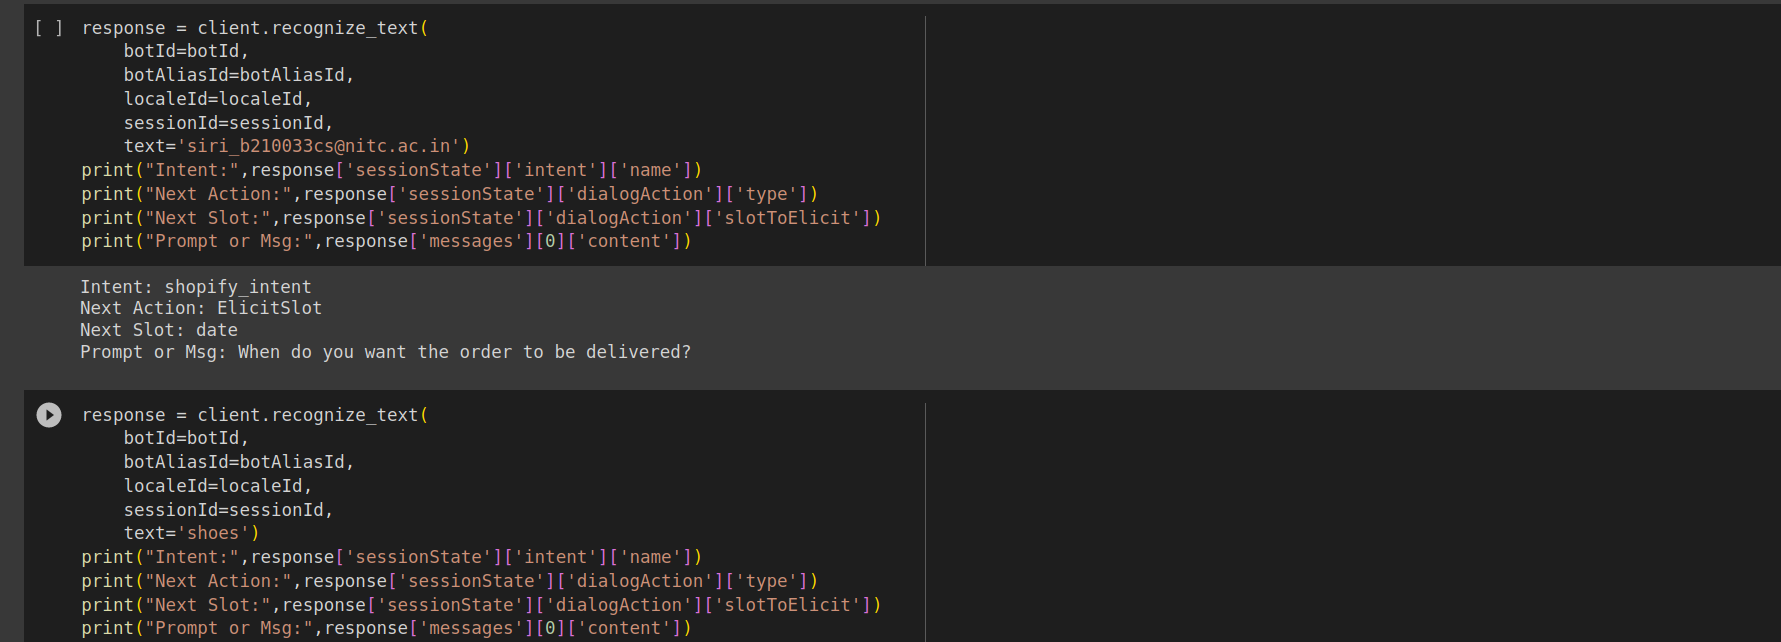

**4. SessionState: confirm intent**
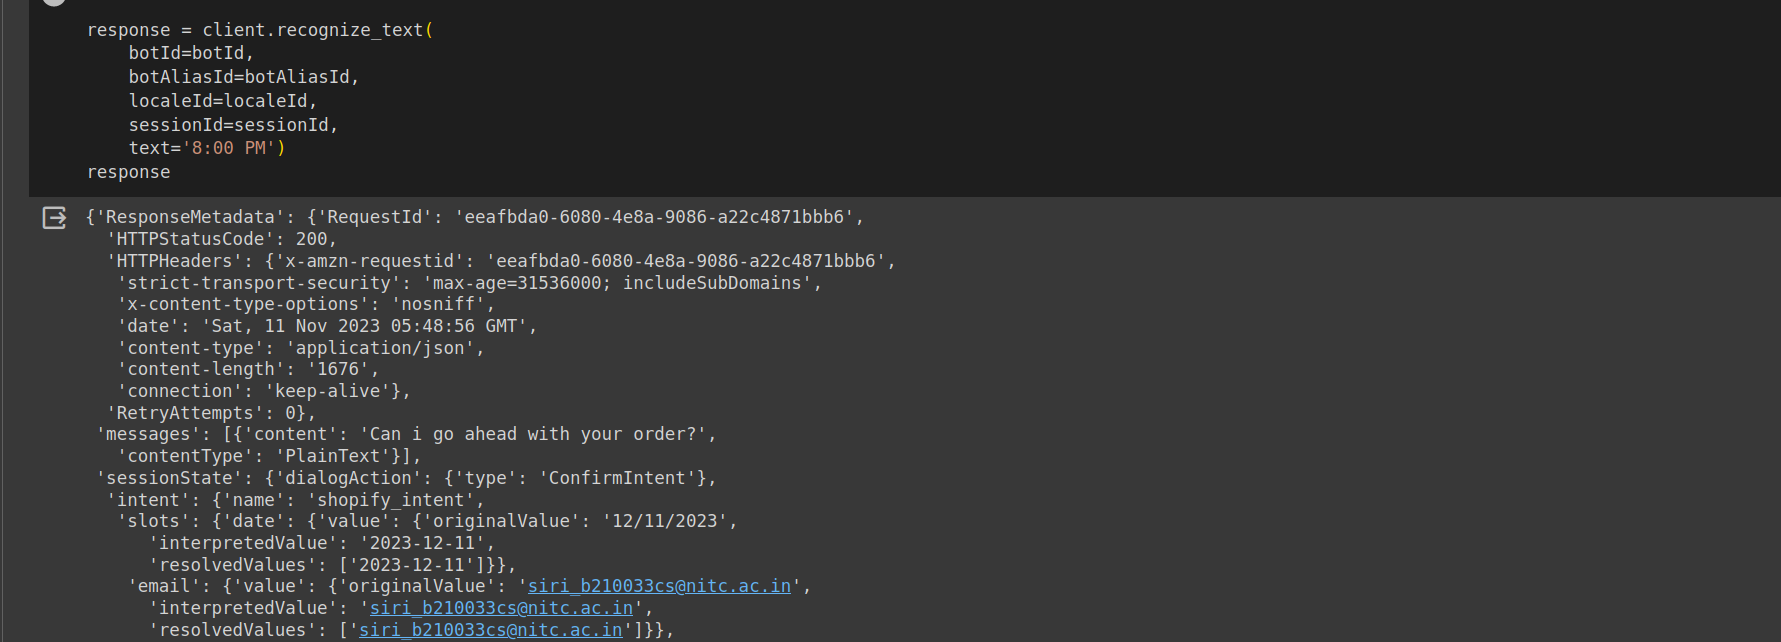

**5. SessionState: close**
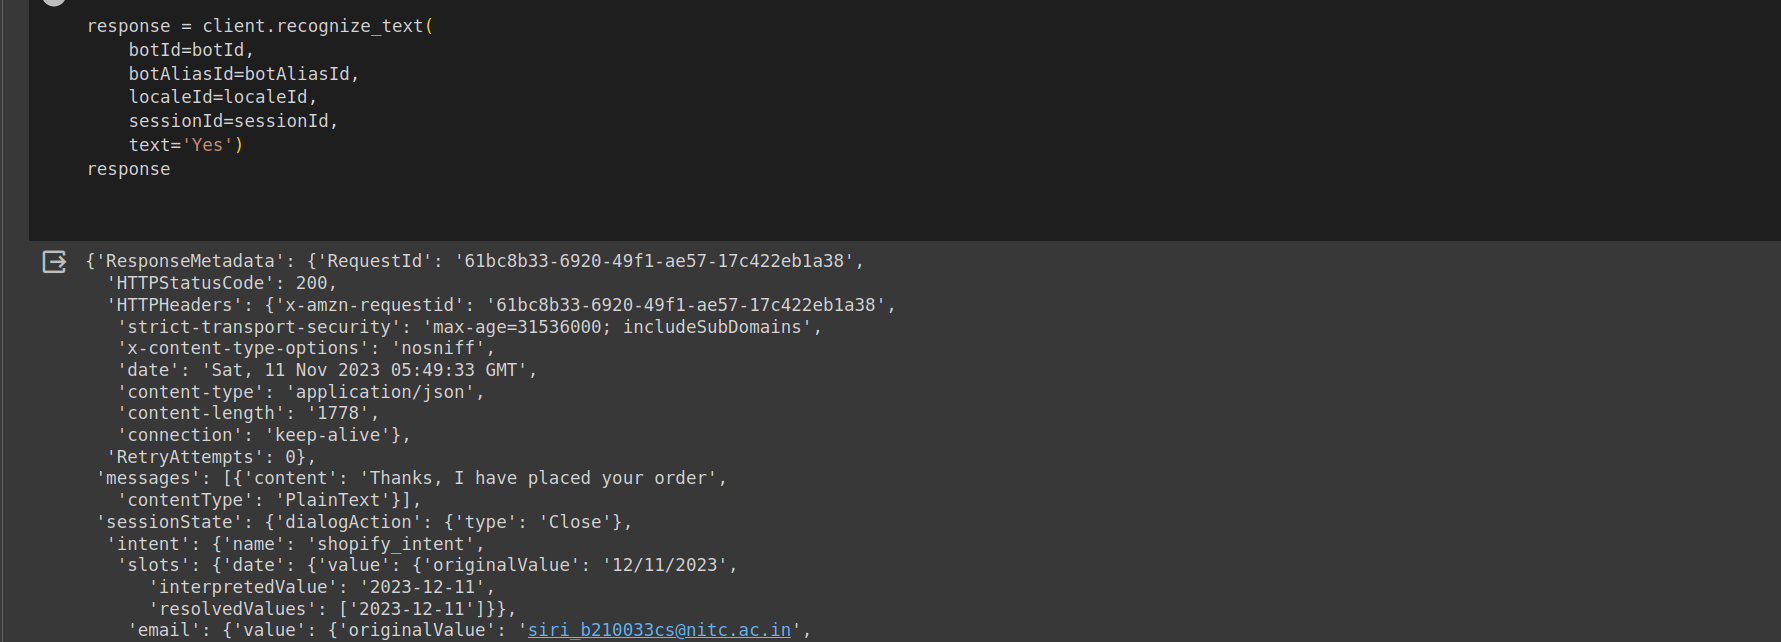

### **Gradio Chat Interface Integration**
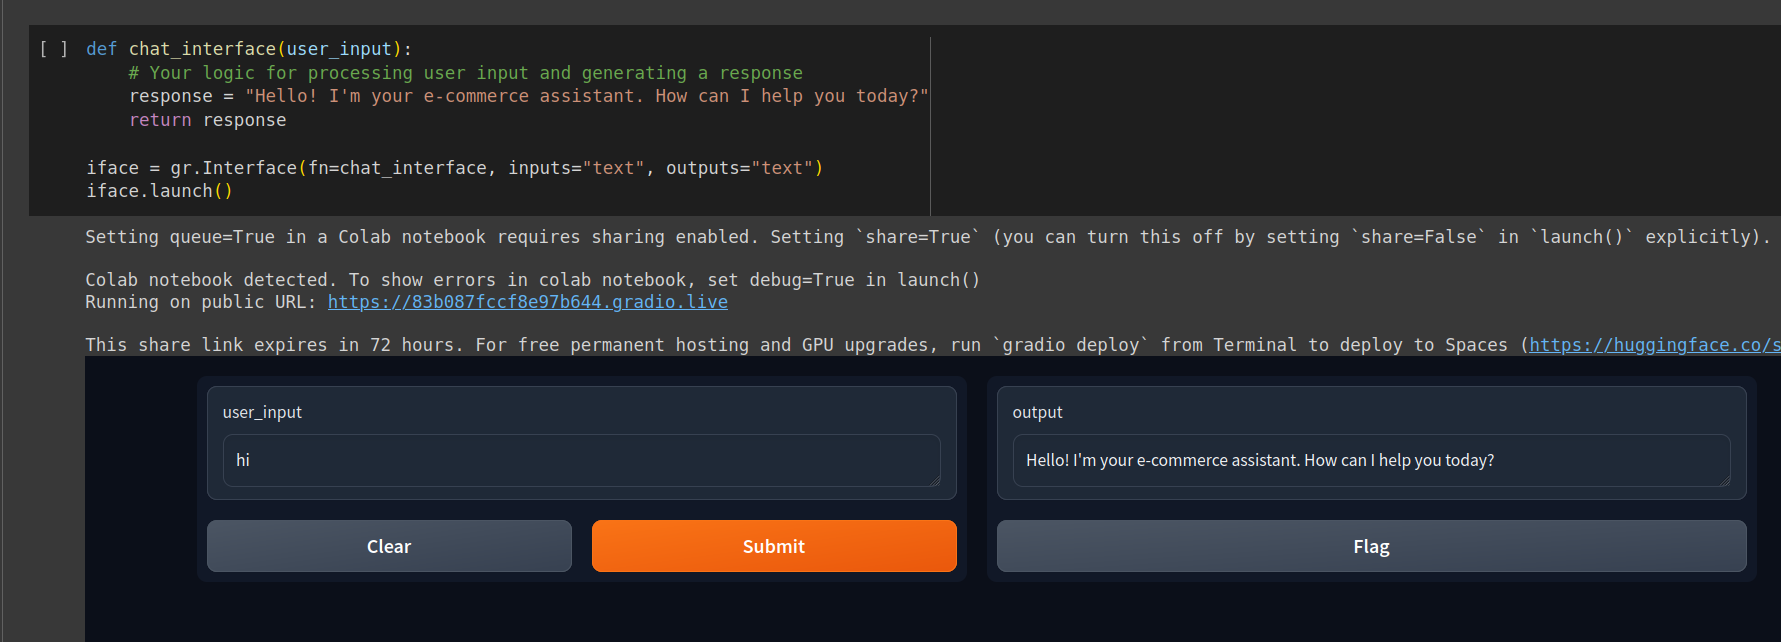
This code sets up a simple Gradio interface that takes text input and displays a text response.

### **Amazon Lex Integration**
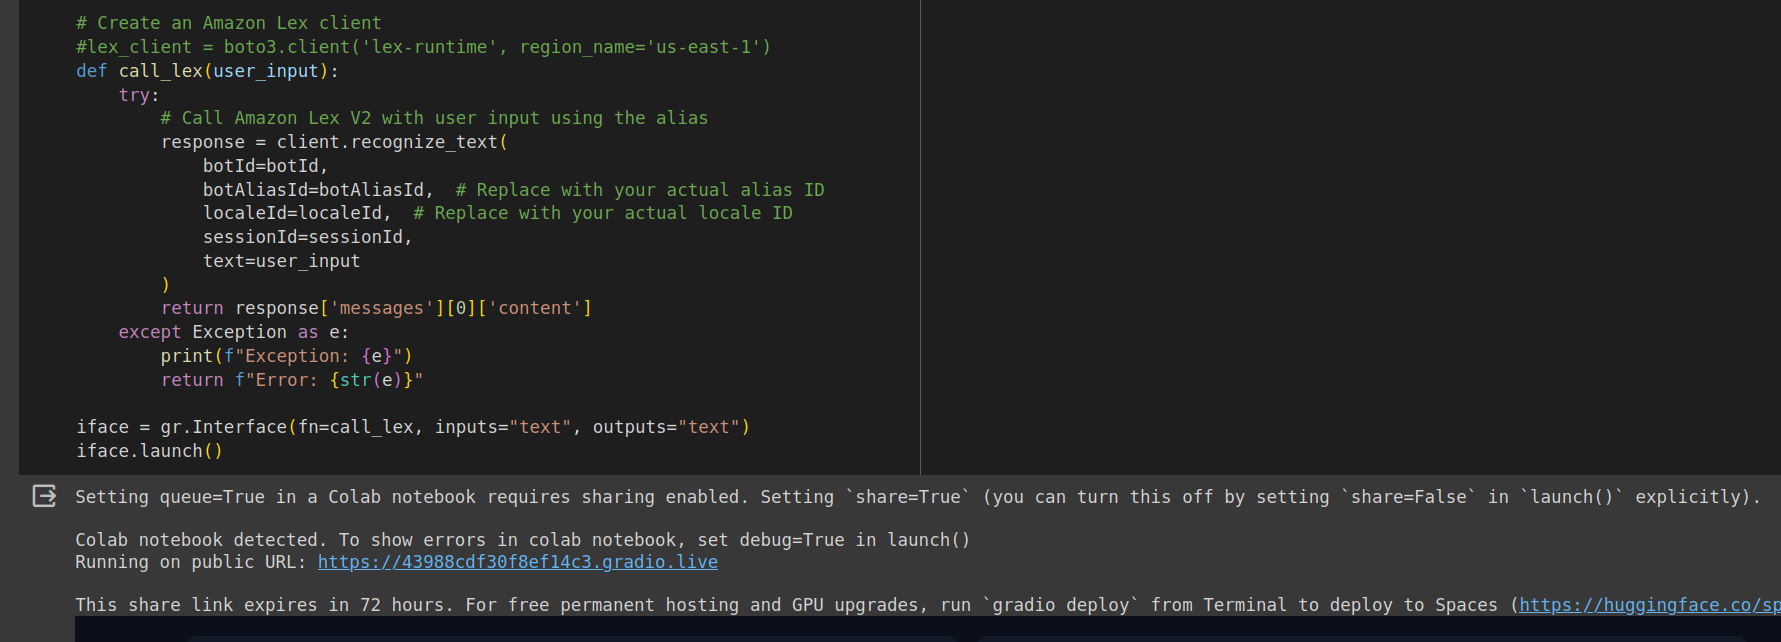
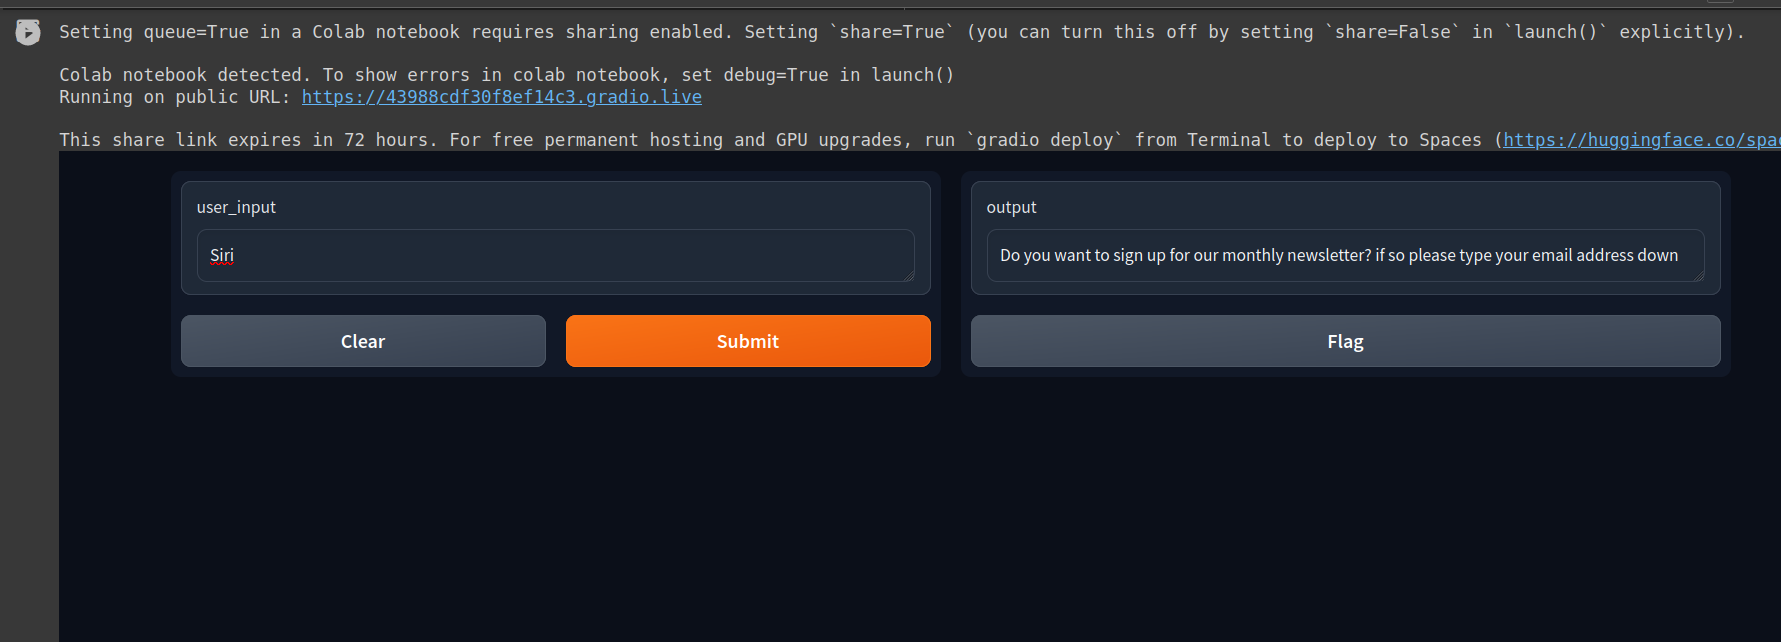

Successfully integrated with the Amazon Lex bot names shopifybot.

### **AWS lambda**
AWS Lambda is an event-driven, serverless computing platform provided by Amazon as a part of Amazon Web Services. It is designed to enable developers to run code without provisioning or managing servers.

Amazon Lex provides prebuilt integration with Lambda, which enables you to use a Lambda function with your Amazon Lex bot.

When you configure an Amazon Lex bot, you can specify a Lambda function to perform validation, fulfillment, or both. For validation, Amazon Lex invokes the Lambda function after each response from the user. The Lambda function can validate the response and provide corrective feedback to the user, if necessary. For fulfillment, Amazon Lex invokes the Lambda function to fulfill the user request after the bot successfully collects all of the required information and receives confirmation from the user. 

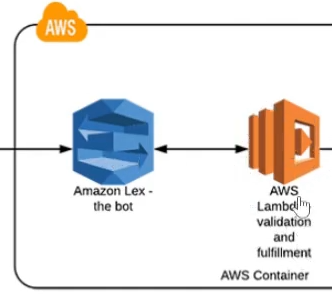

### **Integrating the chatbot with AWS Lambda** 
AWS Lambda is a way to write and run code without worrying about setting up and maintaining the underlying server or computing resources. We can focus on writing our code, and Lambda takes care of executing it and scaling it as needed based on demand. It’s a popular choice for building serverless applications.

### **Why do we need a Lambda Function attached to our chatbot?**

Our Shopify chatbot relies on lambda functions to perform various tasks based on user input or the state of a conversation. This is why we require a lambda function for our project:

    Retrieving Product information: Based on what our users request for a specific product, our Lambda function will retrieve the coressponding product data from a third-party API (here the shopify API). 
    
    Processing user input: Before returning a response to the user, our lambda function will process and validate their input. If a user requests data for a product that does not exist, the lambda function will respond with an appropriate error message.

    Provide additional resources: Based on the user's request, it will provide additional resources.
    
Overall, introducing a Lambda function into our Shopify chatbot will improve its capabilities, allowing it to provide more accurate information to our users while also providing a more engaging conversational experience.

### **AWS lamba set-up**
**-> Created lamba function for the purpose of communicating with the users about the product info and their orders etc
-> Function was written in python**


    import json

    def validate(slots):
    
    if not slots['name']:
        return {
        'isValid': False,
        'violatedSlot': 'name'
    }
        
    if not slots['email']:
        return {
        'isValid': False,
        'violatedSlot': 'email'
    }
    
    if not slots['product']:
        print("Inside Empty Location")
        return {
        'isValid': False,
        'violatedSlot': 'product'
        }        
        
        
    if not slots['date']:
        
        return {
        'isValid': False,
        'violatedSlot': 'date',
    }
    
    if not slots['time']:
        return {
        'isValid': False,
        'violatedSlot': 'time'
    }


    return {'isValid': True}
    


    def lambda_handler(event, context):

    slots = event['sessionState']['intent']['slots']
    intent = event['sessionState']['intent']['name']
    
    print(event['invocationSource'])
    print(slots)
    print(intent)
    
    validation_result = validate(slots)
    print(validation_result)
    if event['invocationSource'] == 'DialogCodeHook':
        
        if not validation_result['isValid']:
            
            response = {
                    "sessionState": {
                        "dialogAction": {
                            'slotToElicit':validation_result['violatedSlot'],
                            "type": "ElicitSlot"
                        },
                        "intent": {
                            'name':intent,
                            'slots': slots
                            
                            }
                    }
            }
        
        else:
            response = {
            "sessionState": {
                "dialogAction": {
                    "type": "Delegate"
                },
                "intent": {
                    'name':intent,
                    'slots': slots
                    
                    }
        
            }
        }
        
    if event['invocationSource'] == 'FulfillmentCodeHook':
        
        # Add order in Database
        
        response = {
        "sessionState": {
            "dialogAction": {
                "type": "Close"
            },
            "intent": {
                'name':intent,
                'slots': slots,
                'state':'Fulfilled'
                
                }
    
        },
        "messages": [
            {
                "contentType": "PlainText",
                "content": "Thanks, I have placed your order"
            }
        ]
    }
    return response


### **Task 3: Shopify API Integration**
Established a connection to the Shopify API to fetch and manipulate e-commerce data such as product information, customer profiles, and order details.
the data being shown here is dummy data I used from the app Simple Sample Data.

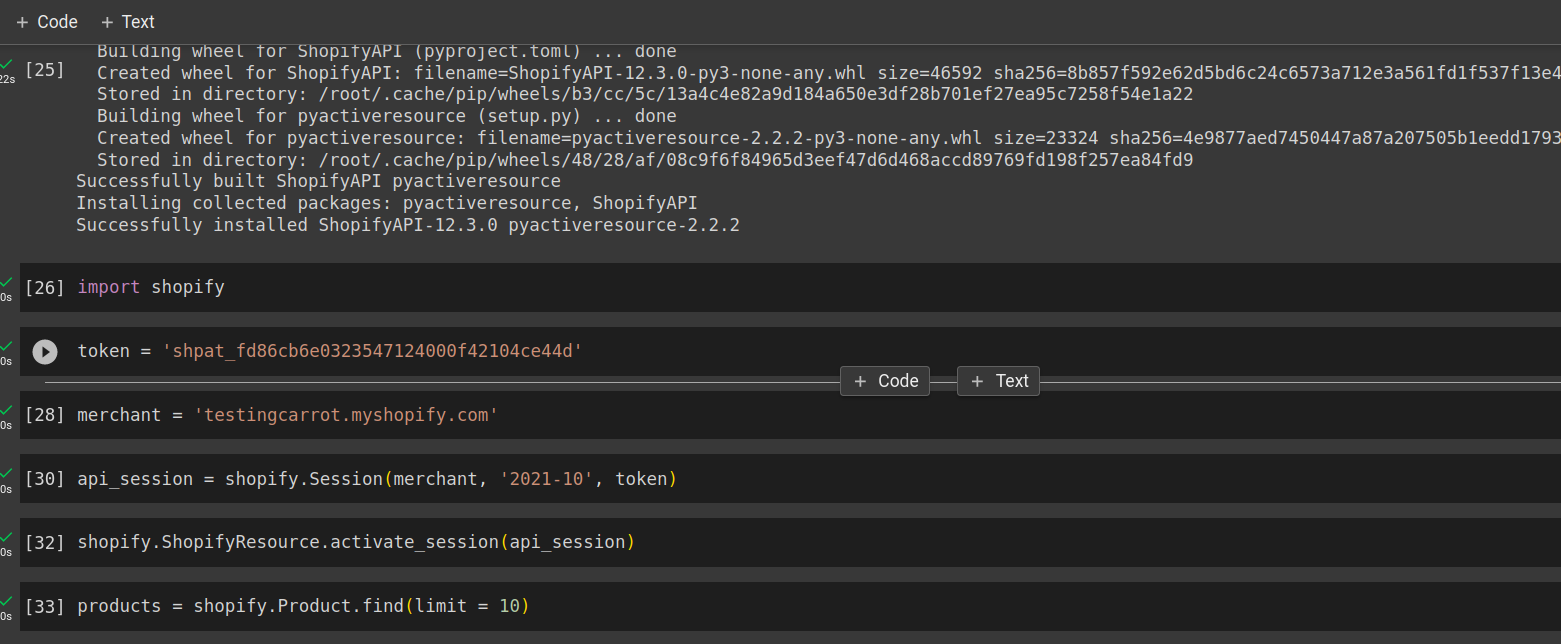

**-> accessing products from the sample products list.**


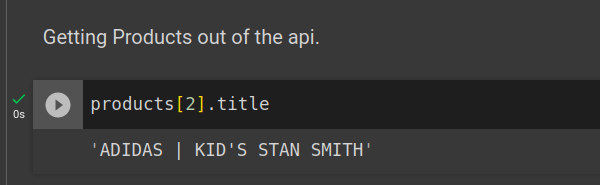